##  <figure>
<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSmq_G9t6lHACmz9nWUQdNAN_ZbHApAJGr_rg&usqp=CAU" width="300px" height="150px" />
</center>
</figure>

In [ ]:
!pip install plotly==4.14.3

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly
import folium
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error


## <font color = #239B56>_**Ecological Footprint**_</font>

<img src="https://www.larioja.org/medio-ambiente/es/desarrollo-sostenible/huella-ecologica/1_intro_definicion_indice.ficheros/626085-recursosnaturalesvivir1.jpg?width=271&height=198&aspectRatio=true" width="120px" height="100px" style="align:right"/>

<font color = #239B56>_**Ecological Footprint**_</font>

Los seres vivos necesitamos recursos del ecosistema para cubrir nuestras necesidades, de esta manera estamos dejando un rastro en la naturaleza por la cantidad de bienes de los que hacemos uso. 
La **Huella Ecológica** mide las superficies productivas que consume la población o los productos para ser producidos, éstas áreas son:

1. Tierras de cultivo
2. Tierras de pastoreo
3. Zonas de pesca  
4. Tierras construidas (urbanización)
5. Áreas forestales
6. Demanda de carbono (para absorver desechos)

La Huella Ecológica es ampliamente utilizada para monitorear la ecología, uso de recursos y fomento del desarrollo sostenible.  

<img src="https://i0.wp.com/icasasecologicas.com/wp-content/uploads/2012/06/deja_una_huella_verde_en_el_planeta.jpg" width="150px" height="75px" style="align:right"/><img src="https://i0.wp.com/icasasecologicas.com/wp-content/uploads/2012/06/deja_una_huella_verde_en_el_planeta.jpg" width="150px" height="75px" style="align:right"/><img src="https://i0.wp.com/icasasecologicas.com/wp-content/uploads/2012/06/deja_una_huella_verde_en_el_planeta.jpg" width="150px" height="75px" style="align:right"/><img src="https://i0.wp.com/icasasecologicas.com/wp-content/uploads/2012/06/deja_una_huella_verde_en_el_planeta.jpg" width="150px" height="75px" style="align:right"/><img src="https://i0.wp.com/icasasecologicas.com/wp-content/uploads/2012/06/deja_una_huella_verde_en_el_planeta.jpg" width="150px" height="75px" style="align:right"/><img src="https://i0.wp.com/icasasecologicas.com/wp-content/uploads/2012/06/deja_una_huella_verde_en_el_planeta.jpg" width="150px" height="75px" style="align:right"/>

Por otro lado la **Biocapacidad** representa la productividad de los activos ecologicos, es lo que la naturaleza ofrece. En las áreas no cosechadas se absorven las emisiones de carbono por la quema de combustibles fósiles.

Tanto la Biocapacidad como la Huella Ecológica se miden en unidades estándar llamdas *hectáreas globales*.

Cuando se comparan la Huella Ecologica y la Biocapacidad de alguna región (estado o país), se puede detectar si tiene `déficit` o `reserva` de biocapacidad, gracias a la [correlación positiva](https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/correlacion%20entre%20biocapacidad%20y%20EF.png?raw=true) que existe entre ellas. 

* Déficit de biocapacidad : La demanda de bienes y servicios de la región excede lo que sus ecosistemas pueden regenerar.
* Reserva de biocapacidad : Cuando la biocapacidad de la región supera a su Huella Ecológica.


##### Un déficit ecológico nacional significa que la nación está importando biocapacidad a través del comercio, liquidando activos ecológicos nacionales o emitiendo desechos de dióxido de carbono a la atmósfera. Existe una reserva ecológica cuando la biocapacidad de una región excede la Huella Ecológica de su población.  
#####Para el año 2016, los países con mayor déficit ecológico y mayor reserva en el mundo fueron:

Déficit | Reserva 
-------------------|------------------
1. China           | 1. Brasil
2. Estados Unidos  | 2. Canadá
3. India           | 3. Rusia
4. Japón           | 4. Argentina
5. Corea del Sur   | 5. República Democrática del Congo
6. Alemania        | 6. Bolivia
7. Reino Unido     | 7. Australia
8. Italia          | 8. Colombia
9. Iran            | 9. Guyana
10. Arabia Saudita | 10. Paraguay





In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Flor37/Analisis-de-datos-con-Python/main/EcoFP.csv')
df

,país,año,registro,tierras_cultivo,tierras_pastoreo,áreas_forestales,zonas_pesca,tierras_construidas,carbono,totalHG,QScore
0,Armenia,1992,AreaPerCap,1.402924e-01,1.995463e-01,9.718805e-02,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,AreaTotHA,4.830000e+05,6.870000e+05,3.346000e+05,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,BiocapPerCap,1.598044e-01,1.352610e-01,8.400321e-02,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,BiocapTotGHA,5.501762e+05,4.656780e+05,2.892071e+05,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,EFConsPerCap,3.875102e-01,1.894622e-01,1.260000e-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...
72176,World,2016,BiocapTotGHA,3.984702e+09,1.504757e+09,5.111763e+09,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72177,World,2016,EFConsPerCap,5.336445e-01,1.402092e-01,2.734954e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72178,World,2016,EFConsTotGHA,3.984702e+09,1.046937e+09,2.042179e+09,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72179,World,2016,EFProdPerCap,5.336445e-01,1.402092e-01,2.734954e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [ ]:
df = df.drop(df[df['país']=='World'].index)

In [ ]:
m_df_16 = df['año'] == 2016
df_16 = df[m_df_16]
df_16

,país,año,registro,tierras_cultivo,tierras_pastoreo,áreas_forestales,zonas_pesca,tierras_construidas,carbono,totalHG,QScore
192,Armenia,2016,AreaPerCap,1.724551e-01,4.008452e-01,1.135796e-01,4.342147e-02,2.931986e-02,0.000000e+00,7.596212e-01,3A
193,Armenia,2016,AreaTotHA,5.044000e+05,1.172400e+06,3.322000e+05,1.270000e+05,8.575530e+04,0.000000e+00,2.221755e+06,3A
194,Armenia,2016,BiocapPerCap,3.529536e-01,2.694153e-01,9.572428e-02,1.603927e-02,6.000722e-02,0.000000e+00,7.941397e-01,3A
195,Armenia,2016,BiocapTotGHA,1.032326e+06,7.879913e+05,2.799763e+05,4.691199e+04,1.755103e+05,0.000000e+00,2.322716e+06,3A
196,Armenia,2016,EFConsPerCap,5.778603e-01,2.177708e-01,2.460487e-01,5.270116e-03,6.000722e-02,8.279445e-01,1.934902e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...
71728,China,2016,BiocapTotGHA,6.874063e+08,1.465867e+08,3.174789e+08,6.161821e+07,1.605388e+08,0.000000e+00,1.373629e+09,3A
71729,China,2016,EFConsPerCap,5.950985e-01,1.404226e-01,2.017235e-01,7.831977e-02,1.118761e-01,2.493462e+00,3.620902e+00,3A
71730,China,2016,EFConsTotGHA,8.539485e+08,2.015023e+08,2.894671e+08,1.123865e+08,1.605388e+08,3.578043e+09,5.195886e+09,3A
71731,China,2016,EFProdPerCap,4.790388e-01,1.021531e-01,1.256897e-01,7.353774e-02,1.118761e-01,2.528774e+00,3.421069e+00,3A


In [ ]:
def_res = df_16[df_16.registro.isin(['BiocapTotGHA', 'EFConsTotGHA'])]
def_res = def_res.drop(['año', 'tierras_cultivo', 'tierras_pastoreo', 'áreas_forestales', 'zonas_pesca', 'tierras_construidas', 'carbono', 'QScore'], axis=1)
def_res

,país,registro,totalHG
195,Armenia,BiocapTotGHA,2.322716e+06
197,Armenia,EFConsTotGHA,5.659239e+06
643,Afghanistan,BiocapTotGHA,1.479555e+07
645,Afghanistan,EFConsTotGHA,2.518633e+07
1091,Albania,BiocapTotGHA,3.016531e+06
...,...,...,...
71234,Sudan,EFConsTotGHA,4.827104e+07
71280,South Sudan,BiocapTotGHA,1.927391e+07
71282,South Sudan,EFConsTotGHA,1.775076e+07
71728,China,BiocapTotGHA,1.373629e+09


In [ ]:
df_dr = def_res.pivot(index='país', columns='registro', values='totalHG')
df_dr['Déficit/Reserva'] = df_dr.apply(lambda x: x['BiocapTotGHA'] - x['EFConsTotGHA'], axis=1)
df_dr['Def/Res'] = df_dr.apply(lambda x: x['Déficit/Reserva'] > 0, axis=1)
df_dr['Def/Res'] = df_dr['Def/Res'].astype(int)
df_dr = df_dr.rename_axis('país').reset_index()
df_dr

registro,país,BiocapTotGHA,EFConsTotGHA,Déficit/Reserva,Def/Res
0,Afghanistan,1.479555e+07,2.518633e+07,-1.039078e+07,0
1,Albania,3.016531e+06,5.875547e+06,-2.859016e+06,0
2,Algeria,2.152769e+07,9.775173e+07,-7.622404e+07,0
3,Angola,5.615271e+07,2.923264e+07,2.692007e+07,1
4,Antigua and Barbuda,8.520904e+04,4.372774e+05,-3.520684e+05,0
...,...,...,...,...,...
180,Venezuela,8.034036e+07,8.017716e+07,1.631990e+05,1
181,Vietnam,9.645380e+07,2.007108e+08,-1.042570e+08,0
182,Yemen,1.149093e+07,1.846830e+07,-6.977372e+06,0
183,Zambia,3.111050e+07,1.571798e+07,1.539252e+07,1


In [ ]:
deficit = df_dr.sort_values('Déficit/Reserva')
deficit.head(10)

registro,país,BiocapTotGHA,EFConsTotGHA,Déficit/Reserva,Def/Res
37,China,1.373629e+09,5.195886e+09,-3.822258e+09,0
177,United States of America,1.174980e+09,2.611074e+09,-1.436093e+09,0
79,India,5.661150e+08,1.547649e+09,-9.815339e+08,0
88,Japan,7.431191e+07,5.739390e+08,-4.996271e+08,0
154,South Korea,3.398510e+07,3.047766e+08,-2.707915e+08,0
67,Germany,1.325332e+08,3.965163e+08,-2.639831e+08,0
175,United Kingdom,7.164859e+07,2.873679e+08,-2.157193e+08,0
85,Italy,5.598022e+07,2.638090e+08,-2.078288e+08,0
81,Iran,5.866167e+07,2.561706e+08,-1.975089e+08,0
145,Saudi Arabia,1.352070e+07,2.012011e+08,-1.876804e+08,0


In [ ]:
reserva = df_dr.sort_values('Déficit/Reserva', ascending=False)
reserva.head(10)

registro,país,BiocapTotGHA,EFConsTotGHA,Déficit/Reserva,Def/Res
24,Brazil,1.806630e+09,5.838049e+08,1.222825e+09,1
32,Canada,5.487886e+08,2.808880e+08,2.679006e+08,1
139,Russia,1.001545e+09,7.428478e+08,2.586971e+08,1
5,Argentina,2.997850e+08,1.475487e+08,1.522362e+08,1
46,Democratic Republic of the Congo,1.994699e+08,5.478698e+07,1.446830e+08,1
21,Bolivia,1.722948e+08,3.467188e+07,1.376229e+08,1
8,Australia,2.961420e+08,1.602028e+08,1.359392e+08,1
38,Colombia,1.771804e+08,9.973481e+07,7.744559e+07,1
75,Guyana,5.229646e+07,2.618031e+06,4.967843e+07,1
130,Paraguay,6.629088e+07,1.952404e+07,4.676683e+07,1


#####En promedio, los países en el mundo tenían un déficit ecólogico de más de 43 millones de Hectáreas Globales.

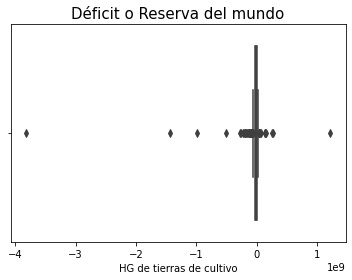

In [ ]:
ax = sns.boxplot(x=df_dr['Déficit/Reserva'])
ax.set_title('Déficit o Reserva del mundo', fontsize= 15)
ax.set(xlabel = 'HG de tierras de cultivo');

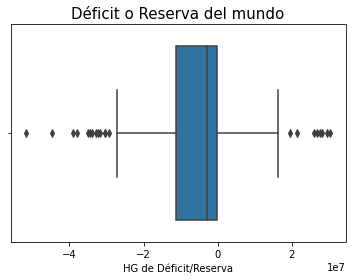

In [ ]:
# Filtrar con IQR
iqr = df_dr["Déficit/Reserva"].quantile(0.75) - df_dr["Déficit/Reserva"].quantile(0.25)

filtro_inferior = df_dr['Déficit/Reserva'] > df_dr['Déficit/Reserva'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_dr['Déficit/Reserva'] < df_dr['Déficit/Reserva'].quantile(0.75) + (iqr * 1.5)

dr_filtrado = df_dr[filtro_inferior & filtro_superior]

ax = sns.boxplot(x = dr_filtrado['Déficit/Reserva'])
ax.set_title('Déficit o Reserva del mundo', fontsize= 15)
ax.set(xlabel = 'HG de Déficit/Reserva');

In [ ]:
print(f'Media: {df_dr["Déficit/Reserva"].mean()}')
print(f'Media filtrada: {dr_filtrado["Déficit/Reserva"].mean()}')
print(f'Mediana: {df_dr["Déficit/Reserva"].median()}')
print(f'Mediana filtrada: {dr_filtrado["Déficit/Reserva"].median()}')
print(f'Desviacón estándar: {df_dr["Déficit/Reserva"].std()}')
print(f'Desviacón estándar filtrada: {dr_filtrado["Déficit/Reserva"].std()}')

Media: -43028494.265301384
Media filtrada: -5110505.330583986
Mediana: -3442822.2190000005
Mediana filtrada: -2879625.5700000003
Desviacón estándar: 328265329.69795614
Desviacón estándar filtrada: 14265300.826350061


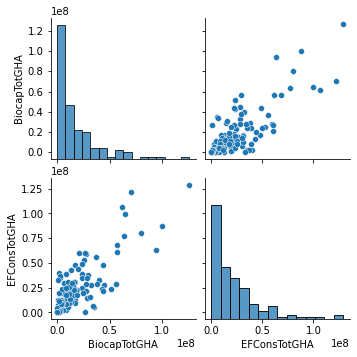

In [ ]:
dr_filtrado = dr_filtrado.drop(['Déficit/Reserva', 'Def/Res'], axis=1)
sns.pairplot(dr_filtrado)

Correlación: 0.818359857547665


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


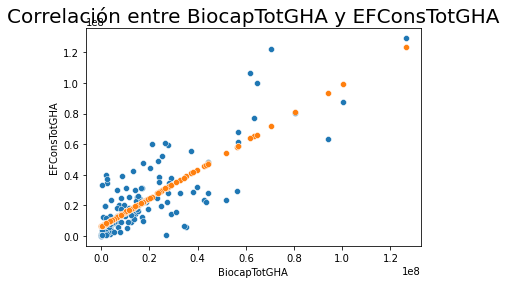

In [ ]:
lr = LinearRegression()

lr.fit(dr_filtrado['BiocapTotGHA'].to_frame(), dr_filtrado['EFConsTotGHA'])
y_predict = lr.predict(dr_filtrado['BiocapTotGHA'].to_frame())

ax = sns.scatterplot(dr_filtrado['BiocapTotGHA'], dr_filtrado['EFConsTotGHA'])
sns.scatterplot(dr_filtrado['BiocapTotGHA'], y_predict)
ax.set_title('Correlación entre BiocapTotGHA y EFConsTotGHA', fontsize=20)
print(f'Correlación: {dr_filtrado["BiocapTotGHA"].corr(dr_filtrado["EFConsTotGHA"])}')

##### País con mayor reserva y mayor déficit ecológico
<figure><center><img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/mapa_dr.png?raw=true" width="630px" height="350px" style="align:right"/></center></figure>

In [ ]:
geojson_countries = f'/content/drive/MyDrive/countries.geojson'

In [ ]:
df_geo = gpd.read_file('/content/drive/MyDrive/countries.geojson')
df_g = df_geo.merge(df_dr, left_on='ADMIN', right_on='país')
df_g

,ADMIN,ISO_A3,geometry,país,BiocapTotGHA,EFConsTotGHA,Déficit/Reserva,Def/Res
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",Aruba,5.934832e+04,6.830439e+05,-6.236956e+05,0
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",Afghanistan,1.479555e+07,2.518633e+07,-1.039078e+07,0
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,5.615271e+07,2.923264e+07,2.692007e+07,1
3,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",Albania,3.016531e+06,5.875547e+06,-2.859016e+06,0
4,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",United Arab Emirates,5.222103e+06,8.267552e+07,-7.745342e+07,0
...,...,...,...,...,...,...,...,...
171,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",Samoa,3.697637e+05,5.776981e+05,-2.079343e+05,0
172,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",Yemen,1.149093e+07,1.846830e+07,-6.977372e+06,0
173,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",South Africa,5.365100e+07,1.765305e+08,-1.228795e+08,0
174,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",Zambia,3.111050e+07,1.571798e+07,1.539252e+07,1


In [ ]:
mapa = folium.Map(location=[19.5, -99], zoom_start=4)
coro = folium.Choropleth(
    geo_data=geojson_countries, 
    name='Choropleth',
    data=df_g,
    columns=['ADMIN', 'Déficit/Reserva'],
    key_on='feature.properties.ADMIN',
    fill_color= 'RdYlGn',
    nan_fill_color='white',
    nan_fill_opacity=0.4,
    legend_name='Déficit y Reserva Mundial'
).add_to(mapa)

folium.LayerControl().add_to(mapa)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

tooltip = folium.features.GeoJson(
    df_g,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['ADMIN', 'Déficit/Reserva'],
        aliases=['Estado', 'Población']
    )
)
coro.geojson.add_child(tooltip )
  
folium.LayerControl().add_to(mapa)    

mapa

In [ ]:
mapa = folium.Map(location=[19.5, -99], zoom_start=4)
coro = folium.Choropleth(
    geo_data=geojson_countries, 
    name='Choropleth',
    data=df_g,
    columns=['ADMIN', 'Déficit/Reserva'],
    key_on='feature.properties.ADMIN',
    fill_color= 'RdYlGn',
    nan_fill_color='white',
    nan_fill_opacity=0.4,
    legend_name='Déficit y Reserva Mundial'
).add_to(mapa)

coro.geojson.add_child(folium.features.GeoJsonTooltip(
        fields=['ADMIN','ISO_A3'],
        aliases=['País', 'Déficit/Reserva'],
        style=('background-color: grey; color: white;'),
        localize=True
        )
)

mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
mapa = folium.Map(location=[19.5, -99], zoom_start=4)
coro = folium.Choropleth(
    geo_data=geojson_countries, 
    name='Choropleth',
    data=df_g,
    columns=['ADMIN', 'Déficit/Reserva'],
    key_on='feature.properties.ADMIN',
    fill_color= 'RdYlGn',
    nan_fill_color='white',
    nan_fill_opacity=0.4,
    legend_name='Déficit y Reserva Mundial'
).add_to(mapa)
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_reglog = df_dr.drop(['país', 'Déficit/Reserva'], axis=1)
df_reglog

registro,BiocapTotGHA,EFConsTotGHA,Def/Res
0,1.479555e+07,2.518633e+07,0
1,3.016531e+06,5.875547e+06,0
2,2.152769e+07,9.775173e+07,0
3,5.615271e+07,2.923264e+07,1
4,8.520904e+04,4.372774e+05,0
...,...,...,...
180,8.034036e+07,8.017716e+07,1
181,9.645380e+07,2.007108e+08,0
182,1.149093e+07,1.846830e+07,0
183,3.111050e+07,1.571798e+07,1


In [ ]:
X = df_reglog.drop(columns=['Def/Res'])
y = df_reglog['Def/Res']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

log_reg.score(X_test, y_test)

1.0

##### Las [métricas de Huella Ecológica Global y biocapacidad](http://www.overshootday.org/newsroom/past-earth-overshoot-days/) se calculan cada año en las Cuentas Nacionales de Huella y Biocapacidad. Utilizando las estadísticas de la ONU, estas cuentas incorporan los datos más recientes y la metodología contable más actualizada (las Cuentas Nacionales de Huella y Biocapacidad de la Edición 2019 incluyen datos de 2016). 

<figure><center><img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/grafica_apilada.png?raw=true" style="align:right"/></center></figure>

In [ ]:
def_res_m = df[df.registro.isin(['BiocapTotGHA', 'EFConsTotGHA'])]
def_res_m = def_res_m.drop(['tierras_cultivo', 'tierras_pastoreo', 'áreas_forestales', 'zonas_pesca', 'tierras_construidas', 'carbono', 'QScore'], axis=1)
def_res_m

,país,año,registro,totalHG
3,Armenia,1992,BiocapTotGHA,1.467355e+06
5,Armenia,1992,EFConsTotGHA,5.951342e+06
11,Armenia,1993,BiocapTotGHA,1.441053e+06
13,Armenia,1993,EFConsTotGHA,3.880463e+06
19,Armenia,1994,BiocapTotGHA,1.439578e+06
...,...,...,...,...
71714,China,2014,EFConsTotGHA,5.240816e+09
71720,China,2015,BiocapTotGHA,1.364406e+09
71722,China,2015,EFConsTotGHA,5.228458e+09
71728,China,2016,BiocapTotGHA,1.373629e+09


In [ ]:
df_dr_m = def_res_m.pivot(index=['país','año'], columns='registro', values='totalHG')
df_dr_m['Déficit/Reserva'] = df_dr_m.apply(lambda x: x['BiocapTotGHA'] - x['EFConsTotGHA'], axis=1)
df_dr_m

registro          BiocapTotGHA  EFConsTotGHA  Déficit/Reserva
país        año                                              
Afghanistan 1961  1.220134e+07   11179719.65      1021622.930
            1962  1.200732e+07   10933828.09      1073490.700
            1963  1.169602e+07   11447234.57       248787.560
            1964  1.196151e+07   11940144.48        21369.670
            1965  1.214095e+07   12566034.66      -425088.570
...                        ...           ...              ...
Zimbabwe    2012  8.527822e+06   17172479.12     -8644656.967
            2013  8.287793e+06   16979516.26     -8691722.910
            2014  8.222159e+06   16590635.11     -8368476.232
            2015  7.775710e+06   16882569.21     -9106858.897
            2016  8.093698e+06   17338109.82     -9244411.448

[8967 rows x 3 columns]

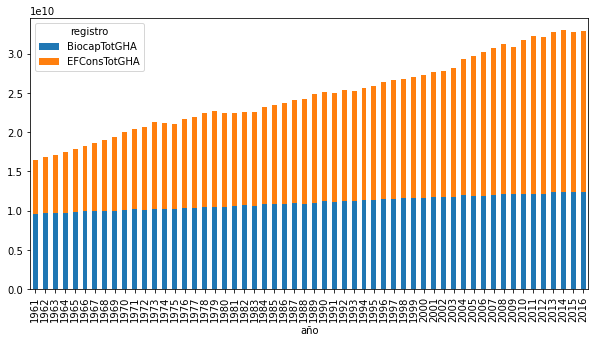

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
b_h = df_dr_m.groupby('año').sum()[['BiocapTotGHA', 'EFConsTotGHA']]
b_h.plot.bar(stacked=True);


#####<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgkIlmOcr_o4SDIwG2FrpLXpfU-807MzpEEA&usqp=CAU" width="120px" height="50px" style="align:right"/>

La **Huella de carbono** representa las Hectareas Globales de áreas biológicamente productivas que se necesitan para absorver el CO2 producido por el uso de combustibles fósiles.

Los países que generaron mayor demanda para la absorción de carbono son China, seguido por Estados Unidos e India.
<img src="https://archive.gulte.com/content/2015/05/news/1430564809-1750.jpg" width="310px" height="140px"/>

In [ ]:
fig = px.treemap(df_16, path=['país', 'registro'], values='carbono')
fig.show()

#####<center><img src="https://www.entornoturistico.com/wp-content/uploads/2020/08/Presentacio%CC%81n-de-Visit-Mexico-1280x720.jpg" width="480px" height="270px" style="align:right"/></center>

**México** es el [décimo país](https://www.worldometers.info/world-population/) más poblado del mundo con más de 130 millones de mexicanos con una [esperanza de vida](https://www.worldometers.info/world-population/mexico-population/) de 75.41 años y un [PIB per capita](https://www.worldometers.info/gdp/mexico-gdp/) de $10,929 US.

Nuestro país cuenta con una enorme variedad de ecosistemas, especies animales y diversos recursos que representan una de las mayores riquezas naturales en el mundo. 

Sin embargo, en el año 2016, México tenía un déficit ecológico de 182,352,141.9 Hectareas Globales.



In [ ]:
m_df_mex = df['país'] == 'Mexico'
df_mex = df[m_df_mex]
df_mex

,país,año,registro,tierras_cultivo,tierras_pastoreo,áreas_forestales,zonas_pesca,tierras_construidas,carbono,totalHG,QScore
41104,Mexico,1961,AreaPerCap,5.284294e-01,1.967274e+00,2.129934e+00,1.072480e+00,2.779198e-02,0.000000e+00,5.725910e+00,3A
41105,Mexico,1961,AreaTotHA,2.081700e+07,7.749900e+07,8.390683e+07,4.224940e+07,1.094840e+06,0.000000e+00,2.255671e+08,3A
41106,Mexico,1961,BiocapPerCap,4.092752e-01,7.491428e-01,1.839334e+00,4.502744e-01,2.152523e-02,0.000000e+00,3.469552e+00,3A
41107,Mexico,1961,BiocapTotGHA,1.612303e+07,2.951181e+07,7.245891e+07,1.773816e+07,8.479673e+05,0.000000e+00,1.366799e+08,3A
41108,Mexico,1961,EFConsPerCap,3.696932e-01,6.916567e-01,2.927553e-01,1.667736e-02,2.152523e-02,4.563753e-01,1.848683e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...
41547,Mexico,2016,BiocapTotGHA,4.179641e+07,2.952205e+07,5.542552e+07,1.696692e+07,5.882082e+06,0.000000e+00,1.495930e+08,3A
41548,Mexico,2016,EFConsPerCap,5.196906e-01,2.363794e-01,2.549179e-01,8.207326e-02,4.611951e-02,1.463494e+00,2.602675e+00,3A
41549,Mexico,2016,EFConsTotGHA,6.628133e+07,3.014783e+07,3.251224e+07,1.046762e+07,5.882082e+06,1.866540e+08,3.319451e+08,3A
41550,Mexico,2016,EFProdPerCap,3.277122e-01,2.314729e-01,1.497621e-01,7.160336e-02,4.611951e-02,1.269428e+00,2.096098e+00,3A


In [ ]:
deficit = df_dr.sort_values('Déficit/Reserva', ignore_index=True)
deficit.head(12)

registro,país,BiocapTotGHA,EFConsTotGHA,Déficit/Reserva,Def/Res
0,China,1.373629e+09,5.195886e+09,-3.822258e+09,0
1,United States of America,1.174980e+09,2.611074e+09,-1.436093e+09,0
2,India,5.661150e+08,1.547649e+09,-9.815339e+08,0
3,Japan,7.431191e+07,5.739390e+08,-4.996271e+08,0
4,South Korea,3.398510e+07,3.047766e+08,-2.707915e+08,0
5,Germany,1.325332e+08,3.965163e+08,-2.639831e+08,0
6,United Kingdom,7.164859e+07,2.873679e+08,-2.157193e+08,0
7,Italy,5.598022e+07,2.638090e+08,-2.078288e+08,0
8,Iran,5.866167e+07,2.561706e+08,-1.975089e+08,0
9,Saudi Arabia,1.352070e+07,2.012011e+08,-1.876804e+08,0


In [ ]:
m_mex = deficit['país'] == 'Mexico'
mex = deficit[m_mex]
mex

registro,país,BiocapTotGHA,EFConsTotGHA,Déficit/Reserva,Def/Res
10,Mexico,149592984.0,331945125.9,-182352141.9,0


##### El déficit ecológico que presenta México se debe a la realización de actividades principales como la agricultura, la ganadería o la quema de combustibles fósiles. 

<img src="https://tradecorp.mx/wp-content/uploads/2018/09/Agricultor-300x193.jpg" width="180px" height="120px" style="align:right"/><img src="https://secure.ganaderia.com/uploads/Upload-59de3c5d09278-11102017.jpeg" width="180px" height="120px" style="align:right"/><img src="https://img.interempresas.net/fotos/641324.jpeg" width="180px" height="120px" style="align:right"/><img src="https://concepto.de/wp-content/uploads/2019/12/ganaderia-aviar-mexico-e1577324429528.jpg" width="180px" height="120px" style="align:right"/><img src="https://www.eluniversal.com.mx/sites/default/files/2020/12/07/cam.jpg" width="180px" height="120px" style="align:right"/>

Podemos observar las distribuciones de nuestros datos en un periodo de 1961 a 2016 y diferenciar cuando hay déficit o reserva en cada área.

<img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/dist_cultivo.png?raw=true" width="480px" height="270px" style="align:right"/><img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/dist_forestales.png?raw=true" width="480px" height="270px" style="align:right"/>

In [ ]:
m_mex_efp = df_mex['registro'] == 'EFConsTotGHA'
mex_efp = df_mex[m_mex_efp]
mex_efp

,país,año,registro,tierras_cultivo,tierras_pastoreo,áreas_forestales,zonas_pesca,tierras_construidas,carbono,totalHG,QScore
41109,Mexico,1961,EFConsTotGHA,14563730.63,27247195.54,11532832.20,6.569897e+05,8.479673e+05,1.797850e+07,7.282721e+07,3A
41117,Mexico,1962,EFConsTotGHA,14426509.43,26635933.39,12112998.01,7.274724e+05,8.979762e+05,1.771461e+07,7.251550e+07,3A
41125,Mexico,1963,EFConsTotGHA,15971643.35,27058609.12,12505958.04,8.638842e+05,9.925722e+05,1.923424e+07,7.662691e+07,3A
41133,Mexico,1964,EFConsTotGHA,18237677.82,28281349.33,12847187.65,8.944381e+05,1.217159e+06,2.206024e+07,8.353805e+07,3A
41141,Mexico,1965,EFConsTotGHA,17855131.98,28045169.97,13313444.08,9.527295e+05,1.297514e+06,2.270400e+07,8.416799e+07,3A
41149,Mexico,1966,EFConsTotGHA,20054131.08,27645506.08,13358141.48,1.050296e+06,1.458425e+06,2.465489e+07,8.822138e+07,3A
41157,Mexico,1967,EFConsTotGHA,19418134.80,28038365.37,14072700.75,1.235168e+06,1.499504e+06,2.772029e+07,9.198416e+07,3A
41165,Mexico,1968,EFConsTotGHA,21486674.67,27373745.44,14282340.43,1.291573e+06,1.650664e+06,2.912228e+07,9.520728e+07,3A
41173,Mexico,1969,EFConsTotGHA,20595023.47,26676536.42,14750277.03,1.282580e+06,1.668840e+06,3.197042e+07,9.694368e+07,3A
41181,Mexico,1970,EFConsTotGHA,24946368.22,26649570.55,15774083.15,1.333878e+06,1.969711e+06,3.645778e+07,1.071314e+08,3A


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

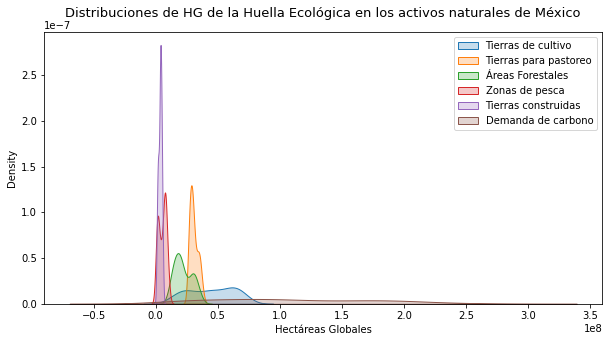

In [ ]:
ax = sns.distplot(mex_efp['tierras_cultivo'], hist=False, kde_kws = {'shade': True}, label='Tierras de cultivo')
sns.distplot(mex_efp['tierras_pastoreo'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Tierras para pastoreo')
sns.distplot(mex_efp['áreas_forestales'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Áreas Forestales')
sns.distplot(mex_efp['zonas_pesca'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Zonas de pesca')
sns.distplot(mex_efp['tierras_construidas'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Tierras construidas')
sns.distplot(mex_efp['carbono'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Demanda de carbono')
ax.set_title('Distribuciones de HG de la Huella Ecológica en los activos naturales de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

In [ ]:
m_mex_bio = df_mex['registro'] == 'BiocapTotGHA'
mex_bio = df_mex[m_mex_bio]
mex_bio

,país,año,registro,tierras_cultivo,tierras_pastoreo,áreas_forestales,zonas_pesca,tierras_construidas,carbono,totalHG,QScore
41107,Mexico,1961,BiocapTotGHA,16123026.93,29511806.06,72458909.77,17738156.45,8.479673e+05,0.0,136679866.5,3A
41115,Mexico,1962,BiocapTotGHA,16437541.75,29442668.67,71835792.55,17696601.22,8.979762e+05,0.0,136310580.4,3A
41123,Mexico,1963,BiocapTotGHA,17550542.82,29343038.95,71116619.97,17636718.49,9.925722e+05,0.0,136639492.4,3A
41131,Mexico,1964,BiocapTotGHA,20802243.91,29279917.84,70453462.40,17598779.36,1.217159e+06,0.0,139351562.6,3A
41139,Mexico,1965,BiocapTotGHA,21426967.14,29175348.98,69874475.35,17535927.94,1.297514e+06,0.0,139310233.2,3A
41147,Mexico,1966,BiocapTotGHA,23283653.60,29165432.01,69340778.34,17529967.32,1.458425e+06,0.0,140778255.9,3A
41155,Mexico,1967,BiocapTotGHA,23138076.88,29080432.90,68687042.64,17478878.36,1.499504e+06,0.0,139883935.2,3A
41163,Mexico,1968,BiocapTotGHA,24622630.00,29022926.26,67852227.12,17444313.82,1.650664e+06,0.0,140592760.9,3A
41171,Mexico,1969,BiocapTotGHA,24067340.80,28820571.53,67087238.14,17322687.93,1.668840e+06,0.0,138966678.0,3A
41179,Mexico,1970,BiocapTotGHA,26069026.01,29252303.61,66373769.71,17358644.32,1.969711e+06,0.0,141023454.9,3A


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

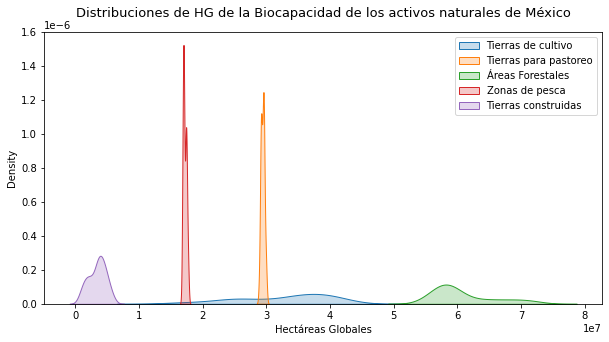

In [ ]:
ax = sns.distplot(mex_bio['tierras_cultivo'], hist=False, kde_kws = {'shade': True}, label='Tierras de cultivo')
sns.distplot(mex_bio['tierras_pastoreo'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Tierras para pastoreo')
sns.distplot(mex_bio['áreas_forestales'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Áreas Forestales')
sns.distplot(mex_bio['zonas_pesca'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Zonas de pesca')
sns.distplot(mex_bio['tierras_construidas'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Tierras construidas')
ax.set_title('Distribuciones de HG de la Biocapacidad de los activos naturales de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



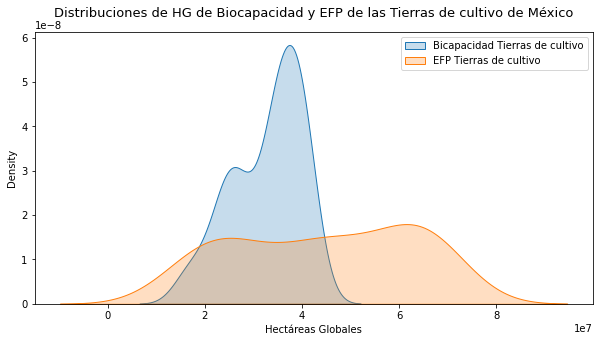

In [ ]:
ax = sns.distplot(mex_bio['tierras_cultivo'], hist=False, kde_kws = {'shade': True}, label='Bicapacidad Tierras de cultivo')
sns.distplot(mex_efp['tierras_cultivo'], hist=False, kde_kws = {'shade': True}, ax=ax, label='EFP Tierras de cultivo')
ax.set_title('Distribuciones de HG de Biocapacidad y EFP de las Tierras de cultivo de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



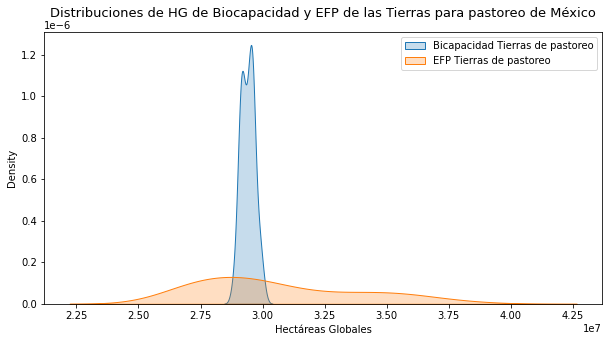

In [ ]:
ax = sns.distplot(mex_bio['tierras_pastoreo'], hist=False, kde_kws = {'shade': True}, label='Bicapacidad Tierras de pastoreo')
sns.distplot(mex_efp['tierras_pastoreo'], hist=False, kde_kws = {'shade': True}, ax=ax, label='EFP Tierras de pastoreo')
ax.set_title('Distribuciones de HG de Biocapacidad y EFP de las Tierras para pastoreo de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



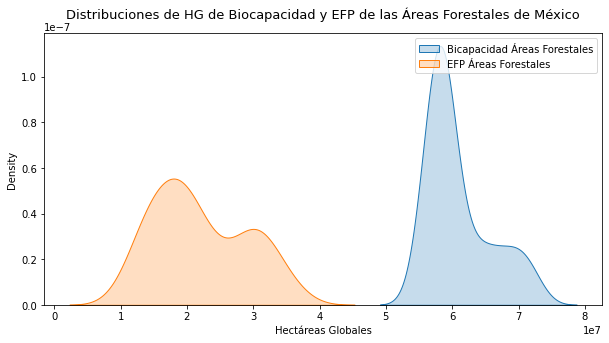

In [ ]:
ax = sns.distplot(mex_bio['áreas_forestales'], hist=False, kde_kws = {'shade': True}, label='Bicapacidad Áreas Forestales')
sns.distplot(mex_efp['áreas_forestales'], hist=False, kde_kws = {'shade': True}, ax=ax, label='EFP Áreas Forestales')
ax.set_title('Distribuciones de HG de Biocapacidad y EFP de las Áreas Forestales de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



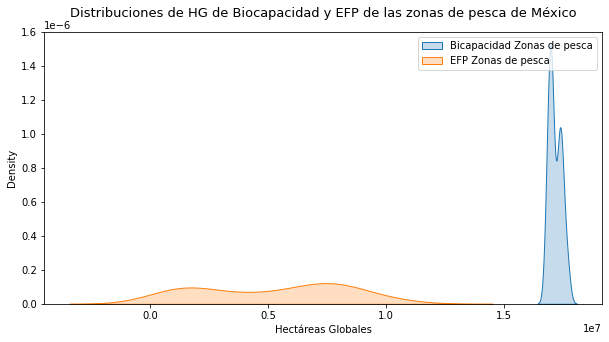

In [ ]:
ax = sns.distplot(mex_bio['zonas_pesca'], hist=False, kde_kws = {'shade': True}, label='Bicapacidad Zonas de pesca')
sns.distplot(mex_efp['zonas_pesca'], hist=False, kde_kws = {'shade': True}, ax=ax, label='EFP Zonas de pesca')
ax.set_title('Distribuciones de HG de Biocapacidad y EFP de las zonas de pesca de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



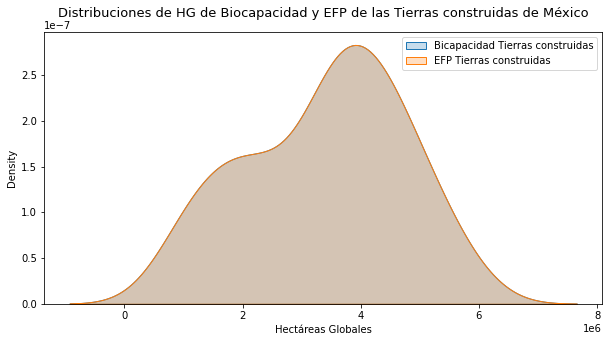

In [ ]:
ax = sns.distplot(mex_bio['tierras_construidas'], hist=False, kde_kws = {'shade': True}, label='Bicapacidad Tierras construidas')
sns.distplot(mex_efp['tierras_construidas'], hist=False, kde_kws = {'shade': True}, ax=ax, label='EFP Tierras construidas')
ax.set_title('Distribuciones de HG de Biocapacidad y EFP de las Tierras construidas de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



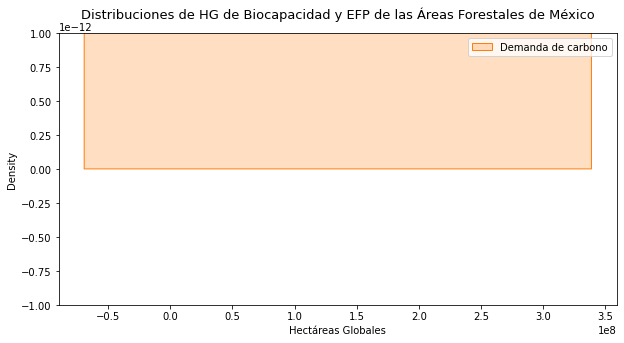

In [ ]:
ax = sns.distplot(mex_bio['carbono'], hist=False, kde_kws = {'shade': True}, label='Demanda de carbono')
sns.distplot(mex_efp['carbono'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Demanda de carbono')
ax.set_title('Distribuciones de HG de Biocapacidad y EFP de las Áreas Forestales de México', fontsize=13, pad=15)
ax.set(xlabel='Hectáreas Globales')
ax.legend(loc='upper right');

#####<center><img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/comparacion.png?raw=true" width="640px" height="640px" style="align:right"/></center>

In [ ]:
dr_mex = df_mex[df_mex.año.isin([1966, 1976, 1986, 1996, 2006, 2016])]
dr_mex = dr_mex[dr_mex.registro.isin(['BiocapTotGHA', 'EFConsTotGHA'])]
dr_mex = dr_mex.drop(['tierras_cultivo', 'tierras_pastoreo', 'áreas_forestales', 'zonas_pesca', 'tierras_construidas', 'carbono', 'QScore'], axis=1)
dr_mex

,país,año,registro,totalHG
41147,Mexico,1966,BiocapTotGHA,1.407783e+08
41149,Mexico,1966,EFConsTotGHA,8.822138e+07
41227,Mexico,1976,BiocapTotGHA,1.363663e+08
41229,Mexico,1976,EFConsTotGHA,1.357410e+08
41307,Mexico,1986,BiocapTotGHA,1.427085e+08
41309,Mexico,1986,EFConsTotGHA,1.805445e+08
41387,Mexico,1996,BiocapTotGHA,1.502511e+08
41389,Mexico,1996,EFConsTotGHA,2.802671e+08
41467,Mexico,2006,BiocapTotGHA,1.481582e+08
41469,Mexico,2006,EFConsTotGHA,3.312245e+08


In [ ]:
dr_mex = dr_mex.pivot(index='año', columns='registro', values='totalHG')
dr_mex

registro,BiocapTotGHA,EFConsTotGHA
año,,
1966,140778255.9,8.822138e+07
1976,136366335.9,1.357410e+08
1986,142708533.6,1.805445e+08
1996,150251065.3,2.802671e+08
2006,148158230.2,3.312245e+08
2016,149592984.0,3.319451e+08


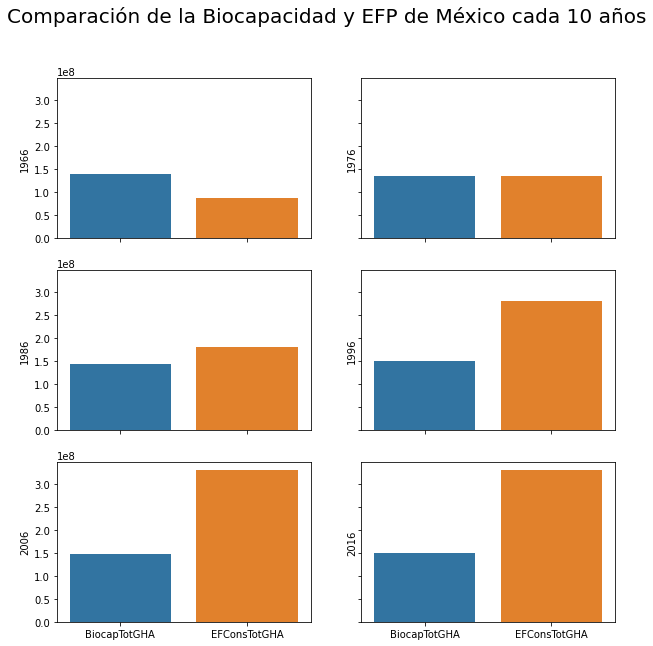

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(10,10), sharex=True, sharey=True)

for i in range(0,3):
  for j in range(0,2):
    sns.barplot(x=dr_mex.columns, y=dr_mex.iloc[i*2 + j*1], ax=axes[i,j])
    axes[i,j].set(xlabel='')

fig.suptitle('Comparación de la Biocapacidad y EFP de México cada 10 años', fontsize = 20);

#####Linear Regression
**Modelo de predicción con Regresión Lineal y Serie de Tiempo**

Tabla de predicciones 

<img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/Tabla%20de%20predicciones.png?raw=true" width="340px" height="365px" style="align:right"/>                  <img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/Predicciones%20EcoFP%20M%C3%A9xico.png?raw=true" width="590px" height="480px" style="align:right"/>

**Modelo de predicción sólo con Regresión Lineal**

<center><img src="https://github.com/Flor37/Analisis-de-datos-con-Python/blob/main/Regresion%20lineal%20EcoFP%20M%C3%A9xico.png?raw=true" width="610px" height="605px" style="align:right"/></center>

In [ ]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [ ]:
reg_mex = df_mex[df_mex.registro.isin(['BiocapTotGHA', 'EFConsTotGHA'])]
reg_mex = reg_mex.drop(['tierras_cultivo', 'tierras_pastoreo', 'áreas_forestales', 'zonas_pesca', 'tierras_construidas', 'carbono', 'QScore'], axis=1)
reg_mex = reg_mex.pivot(index='año', columns='registro', values='totalHG')
reg_mex['index'] = reg_mex.index
reg_mex = reg_mex.rename(columns={'index':'año'})
reg_mex = reg_mex[['año', 'BiocapTotGHA', 'EFConsTotGHA']]
reg_mex = reg_mex.reset_index(drop=True)
#reg_mex = reg_mex.rename_axis('index').reset_index()
reg_mex

registro,año,BiocapTotGHA,EFConsTotGHA
0,1961,136679866.5,7.282721e+07
1,1962,136310580.4,7.251550e+07
2,1963,136639492.4,7.662691e+07
3,1964,139351562.6,8.353805e+07
4,1965,139310233.2,8.416799e+07
5,1966,140778255.9,8.822138e+07
6,1967,139883935.2,9.198416e+07
7,1968,140592760.9,9.520728e+07
8,1969,138966678.0,9.694368e+07
9,1970,141023454.9,1.071314e+08


In [ ]:
serie = reg_mex['EFConsTotGHA'].to_numpy()

In [ ]:
X, y = transformarSerieADataset(serie, elementosPorMuestra=10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27, 10)
(18, 10)
(27,)
(18,)


In [ ]:
modelo_lr_st = LinearRegression()
modelo_lr_st.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict = modelo_lr_st.predict(X_train)
MSE = mean_squared_error(y_train, y_train_predict)
print("Entrenamiento: MSE = " + str(MSE))

y_test_predict = modelo_lr_st.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE = " + str(MSE))

Entrenamiento: MSE = 163649716674248.38
Pruebas: MSE = 1421933681887010.5


In [ ]:
df_predicciones = pd.DataFrame({'valor real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor real,prediccion,diferencia
0,325725800.5,3.340357e+08,-8.309923e+06
1,373610256.9,3.032394e+08,7.037087e+07
2,280267081.4,2.419033e+08,3.836375e+07
3,134630308.4,1.330739e+08,1.556413e+06
4,230649600.0,2.204905e+08,1.015906e+07
5,282706374.3,2.540202e+08,2.868616e+07
6,143213688.2,1.446459e+08,-1.432189e+06
7,137450725.3,1.403397e+08,-2.889008e+06
8,389090012.9,2.748870e+08,1.142030e+08
9,233051201.4,2.386367e+08,-5.585479e+06


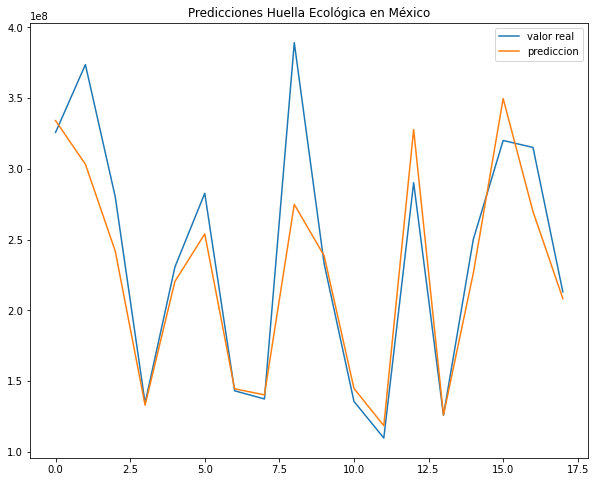

In [ ]:
plot = df_predicciones[['valor real', 'prediccion']].plot(figsize=(10,8))
plt.title('Predicciones Huella Ecológica en México');

In [ ]:
año = reg_mex['año']
BiocapTotGHA = reg_mex['BiocapTotGHA']	
EFConsTotGHA = reg_mex['EFConsTotGHA']

In [ ]:
X = np.array([año]).T
y = np.array([EFConsTotGHA]).T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
modelo_lr_2 = LinearRegression()
modelo_lr_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = modelo_lr_2.predict(X_train)
y_predict

array([[2.79713228e+08],
       [1.47529561e+08],
       [2.22242068e+08],
       [3.42931503e+08],
       [1.07299750e+08],
       [9.00584017e+07],
       [1.93506489e+08],
       [2.85460344e+08],
       [1.01552634e+08],
       [6.13228220e+07],
       [2.33736300e+08],
       [1.87759373e+08],
       [2.62471880e+08],
       [2.16494953e+08],
       [1.30288213e+08],
       [3.02701692e+08],
       [2.39483416e+08],
       [3.08448808e+08],
       [2.05000721e+08],
       [2.50977648e+08],
       [2.68218996e+08],
       [1.99253605e+08],
       [8.43112858e+07],
       [2.96954576e+08],
       [2.10747837e+08],
       [3.37184387e+08],
       [3.19943040e+08],
       [1.82012257e+08],
       [1.53276677e+08],
       [3.54425735e+08],
       [5.55757060e+07],
       [2.27989184e+08],
       [1.76265141e+08],
       [1.13046865e+08],
       [3.48678619e+08],
       [1.36035329e+08],
       [2.56724764e+08],
       [1.18793981e+08],
       [1.24541097e+08]])

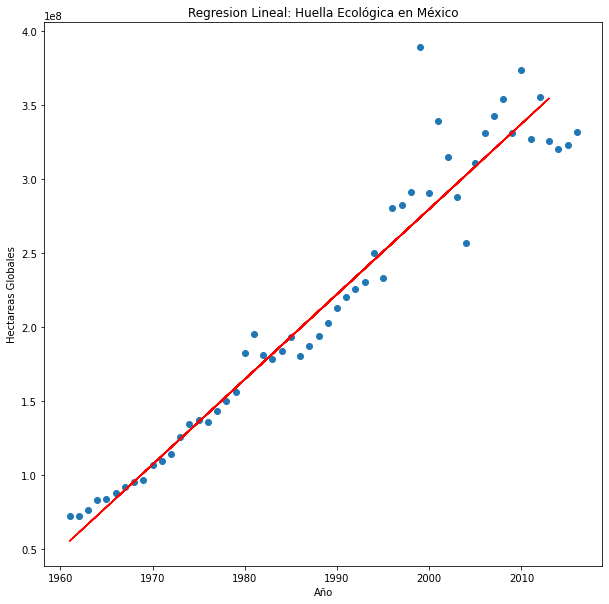

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(año, EFConsTotGHA, label = 'EcoFP')
plt.plot(X_train, y_predict, color = 'red',  label='RL')
plt.title('Regresion Lineal: Huella Ecológica en México')
plt.xlabel('Año')
plt.ylabel('Hectareas Globales');

#####<center><img src="https://i.pinimg.com/originals/b8/68/f9/b868f90da9100986281527a0e47d0165.jpg" width="300px" height="212px" style="align:right"/></center>

#####Arena de clasificadores **Reserva o Déficit**

In [ ]:
df_dr

registro,país,BiocapTotGHA,EFConsTotGHA,Déficit/Reserva,Def/Res
0,Afghanistan,1.479555e+07,2.518633e+07,-1.039078e+07,0
1,Albania,3.016531e+06,5.875547e+06,-2.859016e+06,0
2,Algeria,2.152769e+07,9.775173e+07,-7.622404e+07,0
3,Angola,5.615271e+07,2.923264e+07,2.692007e+07,1
4,Antigua and Barbuda,8.520904e+04,4.372774e+05,-3.520684e+05,0
...,...,...,...,...,...
180,Venezuela,8.034036e+07,8.017716e+07,1.631990e+05,1
181,Vietnam,9.645380e+07,2.007108e+08,-1.042570e+08,0
182,Yemen,1.149093e+07,1.846830e+07,-6.977372e+06,0
183,Zambia,3.111050e+07,1.571798e+07,1.539252e+07,1


In [ ]:
pais = df_dr['país']
BiocapTotGHA = df_dr['BiocapTotGHA']	
EFConsTotGHA = df_dr['EFConsTotGHA']	
Déficit_Reserva = df_dr['Déficit/Reserva']	
Def_Res = df_dr['Def/Res']

In [ ]:
X = np.array([BiocapTotGHA, EFConsTotGHA, Déficit_Reserva]).T
y = np.array([Def_Res]).T

In [ ]:
len(y)

185

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  accuracy = accuracy * 100
  return accuracy
def calcularSencibilidad(TP, TN, FP, FN):
  sensibilidad = TP / (TP + FN)
  sensibilidad = sensibilidad * 100
  return sensibilidad
def calcularEspecifidad(TP, TN, FP, FN):
  especificidad = TN / (TN + FP)
  especificidad = especificidad * 100
  return especificidad

In [ ]:
def Resultado(y_test, y_pred):
  resultado = confusion_matrix(y_test, y_pred)
  print(resultado)
  (TN, FP, FN, TP) = resultado.ravel()
  print('True positives: ' + str(TP))
  print('True negatives: ' + str(TN))
  print('False positives: ' + str(FP))
  print('False negatives: ' + str(FN))

  acc = calcularAccuracy(TP, TN, FP, FN)
  sen = calcularSencibilidad(TP, TN, FP, FN)
  spec = calcularEspecifidad(TP, TN, FP, FN)
  print('Precision: ' + str(acc) + '%')
  print('Sensibilidad: ' + str(sen) + '%')
  print('Especificidad: ' + str(spec) + '%')

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=900)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
modelo_nn = MLPClassifier(hidden_layer_sizes=(32,16,8), max_iter=10000, activation='relu', tol=1e-8)
modelo_nn.fit(X_train, y_train)
y_pred_nn = modelo_nn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)
y_pred_svm = modelo_svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
modelo_gnb = GaussianNB()
modelo_gnb.fit(X_train, y_train)
y_pred_gnb = modelo_gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print('Random Forest')
Resultado(y_test, y_pred_rf)
print('NN')
Resultado(y_test, y_pred_nn)
print('SVM')
Resultado(y_test, y_pred_svm)
print('NBC')
Resultado(y_test, y_pred_gnb)

Random Forest
[[34  0]
 [ 2 20]]
True positives: 20
True negatives: 34
False positives: 0
False negatives: 2
Precision: 96.42857142857143%
Sensibilidad: 90.9090909090909%
Especificidad: 100.0%
NN
[[34  0]
 [ 1 21]]
True positives: 21
True negatives: 34
False positives: 0
False negatives: 1
Precision: 98.21428571428571%
Sensibilidad: 95.45454545454545%
Especificidad: 100.0%
SVM
[[34  0]
 [20  2]]
True positives: 2
True negatives: 34
False positives: 0
False negatives: 20
Precision: 64.28571428571429%
Sensibilidad: 9.090909090909092%
Especificidad: 100.0%
NBC
[[34  0]
 [20  2]]
True positives: 2
True negatives: 34
False positives: 0
False negatives: 20
Precision: 64.28571428571429%
Sensibilidad: 9.090909090909092%
Especificidad: 100.0%
